In [69]:
#Standard Imports
import numpy as np
import pandas as pd

#visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as mtr
plt.style.use('ggplot')

#sklearn libraries
from sklearn import linear_model
from sklearn import metrics as mtr
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve,precision_recall_fscore_support
import itertools

In [75]:
def plot_confusion_matrix(cm, classes, normalize = False):
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('Confusion Matrix', size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    
    
def plot_roc_curve(y, prob):
    base_fpr, base_tpr, _ = mtr.roc_curve(y, [1 for _ in range(len(y))])
    model_fpr, model_tpr, _ = mtr.roc_curve(y, prob)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'rf')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

    
def train_test_measure(model, xtr, ytr, xte, yte):
    model.fit(xtr, ytr)
    y_test_pred = model.predict(xte)    
    y_test_pred_proba = model.predict_proba(xte)[:,1]
    
    results = (mtr.precision_recall_fscore_support(yte,y_test_pred,beta = 2))
    # precisionfloat (if average is not None) or array of float, shape = [n_unique_labels]
    # recallfloat (if average is not None) or array of float, shape = [n_unique_labels]
    # fbeta_scorefloat (if average is not None) or array of float, shape = [n_unique_labels]
    
    cm = mtr.confusion_matrix(yte, y_test_pred)
    plot_confusion_matrix(cm, ['0 - Normal', '1 - Ponzi'])
    
    specificity = cm[0][0] / (cm[0][0] + cm[0][1])
    sensitivity = cm[0][0] / (cm[0][0] + cm[1][0])
    recall = mtr.recall_score(yte,y_test_pred)
    print('accuracy:', mtr.accuracy_score(yte,y_test_pred))
    print('precision non-fraud:', results[0][0], 'precision fraud:', results[0][1])
    print('recall non-fraud:', results[1][0], "recall fraud:", results[1][1])
    print('f2 non-fraud:', results[2][0], "f2 fraud: ", results[2][1]  )
    print('sensitivity:', sensitivity)
    print('specificity:', specificity)
    print('g mean: ', (recall*specificity)**0.5)
    print('auc:', mtr.roc_auc_score(yte, y_test_pred_proba))
    plot_roc_curve(yte, y_test_pred_proba)


In [ ]:
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    fbeta = metrics.fbeta_score(y_test, y_pred, beta = 2)
    auc = metrics.roc_auc_score(y_test, y_pred)

    report = """
    Accuracy: {}
    Precision: {}
    Recall: {} 
    F1: {}
    Fbeta: {}

    """.format(accuracy, precision, recall, f1, fbeta)
    print(report)
    
    print('classification report:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))

In [57]:
df_train = pd.read_csv('../data/training_set_(50_50).csv', index_col = 0)
df_test = pd.read_csv('../data/testing_set_(90_10).csv', index_col = 0)
df_train = df_train.drop(columns = ["account_balance", "account_creation_time", "gini_coefficient_values_received","gini_coefficient_values_sent"])
df_test = df_test.drop(columns = ["account_balance", "account_creation_time", "gini_coefficient_values_received","gini_coefficient_values_sent"])

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
x_train = df_train.drop(columns = ['ponzi'])
y_train = df_train['ponzi']
x_test = df_test.drop(columns = ['ponzi'])
y_test = df_test['ponzi']
print(x_train.shape, np.sum(y_train), x_test.shape, np.sum(y_test))

(41666, 23) 20833 (4999, 23) 499


accuracy: 0.396879375875175
precision non-fraud: 0.9626168224299065 precision fraud: 0.12934590453741898
recall non-fraud: 0.3433333333333333 recall fraud: 0.8797595190380761
f2 non-fraud: 0.3940321346595256 f2 fraud:  0.40723562152133586
sensitivity: 0.9626168224299065
specificity: 0.3433333333333333
g mean:  0.5495914557224055
auc: 0.8136415052326875


C:\Users\s3mschen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\s3mschen\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\s3mschen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and wil

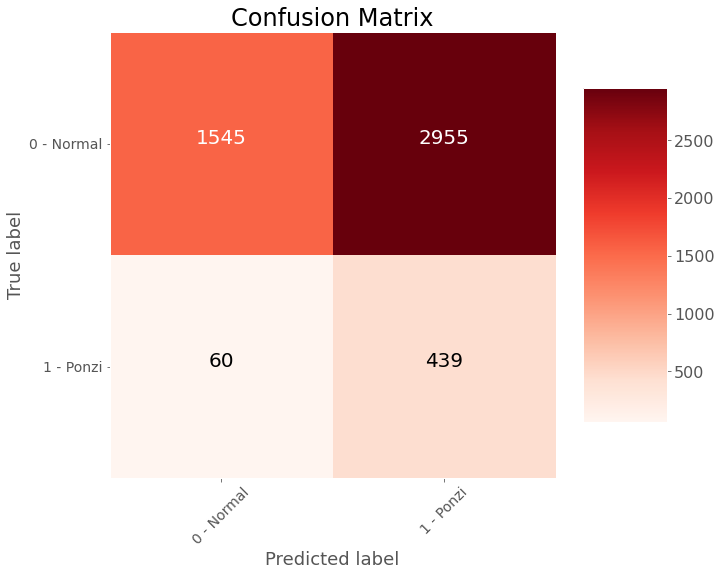

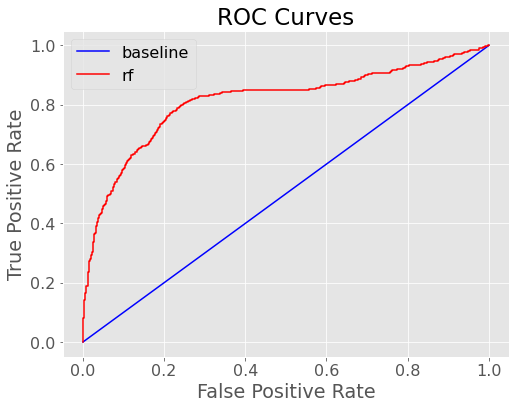

In [76]:
lr = linear_model.LogisticRegression(solver = 'lbfgs')
train_test_measure(lr, x_train, y_train, x_test, y_test)